In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
accident = pd.read_csv('dataset/accident_data.csv')

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


<h1>DATA CLEANSING</h1>

In [6]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [7]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unaccounted')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [8]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>ADJUSTING DATA TYPES</h1>

In [9]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [10]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

<h1>EXTRACTING DATE INFORMATION USING PANDAS DATE TIME</h1>

In [11]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek # Monday = 0  Sunday = 6

In [12]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h1>UNIVARIATE ANALYSIS ON ACCIDENT THAT HAPPENED IN 2019</h1>

In [13]:
df_2019 = accident[accident['Year'] == 2019]

In [14]:
df_2019['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

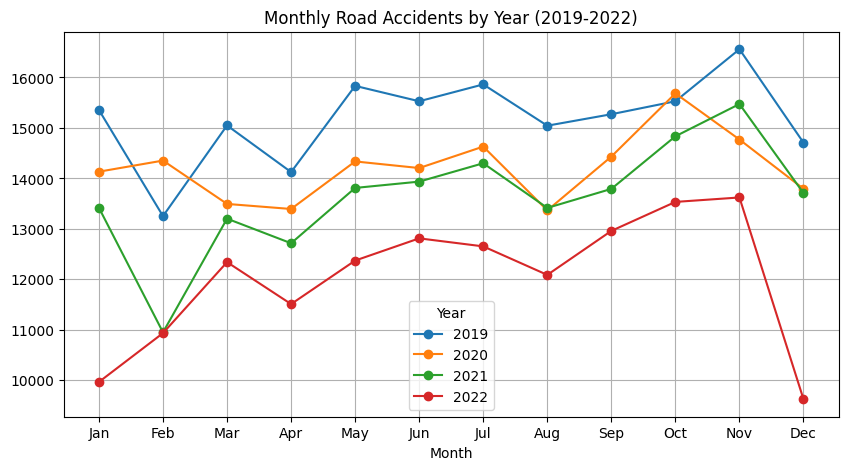

In [15]:
monthly_data = accident.groupby(['Year', 'Month']) ['Index'].count()
monthly_data = monthly_data.unstack(level=0)
monthly_data.plot(
    marker= 'o',
    figsize= (10, 5),
    title= 'Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=1.0)
plt.show()

In [16]:
accident[accident['Accident_Severity'] == 'Fatal']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
7,200701BS67370,Fatal,2019-10-03,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,10,3,3
11,200701BS67747,Fatal,2019-11-02,51.499127,Daylight,Kensington and Chelsea,-0.159652,1,2,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,11,2,5
20,200701BS68301,Fatal,2019-10-24,51.505996,Daylight,Kensington and Chelsea,-0.214277,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,10,24,3
21,200701BS68302,Fatal,2019-11-24,51.486795,Daylight,Kensington and Chelsea,-0.170375,5,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,11,24,6
717,200701CP00032,Fatal,2019-01-30,51.510978,Daylight,City of London,-0.107581,1,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Car,2019,1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660470,201091NH00529,Fatal,2022-01-29,58.475726,Daylight,Western Isles,-6.278583,1,1,Wet or damp,Single carriageway,Rural,Fine + high winds,Car,2022,1,29,5
660519,201091NJ01533,Fatal,2022-02-02,58.495554,Daylight,Highland,-4.451628,1,1,Snow,Single carriageway,Rural,Snowing no high winds,Car,2022,2,2,2
660565,201091NJ11329,Fatal,2022-08-15,57.871514,Daylight,Highland,-4.243081,1,1,Dry,Single carriageway,Rural,Fine no high winds,Goods 7.5 tonnes mgw and over,2022,8,15,0
660581,201091NJ14695,Fatal,2022-10-21,58.445475,Darkness - lights lit,Highland,-3.065535,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2022,10,21,4


In [17]:
accident[accident['District Area'] == 'City of London']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
692,200701CP00003,Slight,2019-01-08,51.510898,Daylight,City of London,-0.102684,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019,1,8,1
693,200701CP00006,Slight,2019-01-16,51.515721,Daylight,City of London,-0.100610,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Taxi/Private hire car,2019,1,16,2
694,200701CP00007,Slight,2019-01-18,51.509123,Darkness - lights lit,City of London,-0.087482,1,2,Wet or damp,Dual carriageway,Urban,Raining + high winds,Van / Goods 3.5 tonnes mgw or under,2019,1,18,4
695,200701CP00008,Serious,2019-01-17,51.518599,Daylight,City of London,-0.100634,1,1,Wet or damp,Single carriageway,Urban,Raining no high winds,Motorcycle 125cc and under,2019,1,17,3
696,200701CP00010,Slight,2019-01-23,51.508932,Darkness - lights lit,City of London,-0.081293,2,2,Dry,Dual carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,1,23,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522150,201001HT20829,Slight,2022-11-05,51.514113,Daylight,City of London,-0.073725,1,1,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2022,11,5,5
522172,201001HT20857,Slight,2022-12-01,51.511039,Daylight,City of London,-0.072702,1,1,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle 50cc and under,2022,12,1,3
527028,201001MM70780,Slight,2022-09-16,51.504618,Daylight,City of London,-0.075999,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,9,16,4
532401,201001TA00322,Serious,2022-10-03,51.510053,Darkness - lights lit,City of London,-0.072887,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,10,3,0


In [18]:
london_fatal = accident[(accident['Accident_Severity'] == 'Fatal') & (accident['District Area'] == 'City of London')]

In [19]:
london_fatal

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
717,200701CP00032,Fatal,2019-01-30,51.510978,Daylight,City of London,-0.107581,1,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Car,2019,1,30,2
997,200701CP00318,Fatal,2019-11-19,51.516045,Darkness - lights lit,City of London,-0.081859,7,2,Wet or damp,Dual carriageway,Urban,Raining no high winds,Motorcycle over 500cc,2019,11,19,1
183074,200801CP00222,Fatal,2020-09-18,51.510836,Daylight,City of London,-0.093319,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Car,2020,9,18,4
183146,200801CP00295,Fatal,2020-11-28,51.518081,Darkness - lights lit,City of London,-0.079900,1,1,Wet or damp,Single carriageway,Urban,Fine no high winds,Car,2020,11,28,5
353392,200901CP00040,Fatal,2021-04-24,51.509631,Daylight,City of London,-0.085587,2,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,4,24,5
368287,200901TB00089,Fatal,2021-06-12,51.517812,Daylight,City of London,-0.107586,1,2,Dry,Roundabout,Urban,Fine no high winds,Car,2021,6,12,5
517269,201001CP00342,Fatal,2022-08-17,51.515808,Daylight,City of London,-0.089364,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,8,17,2


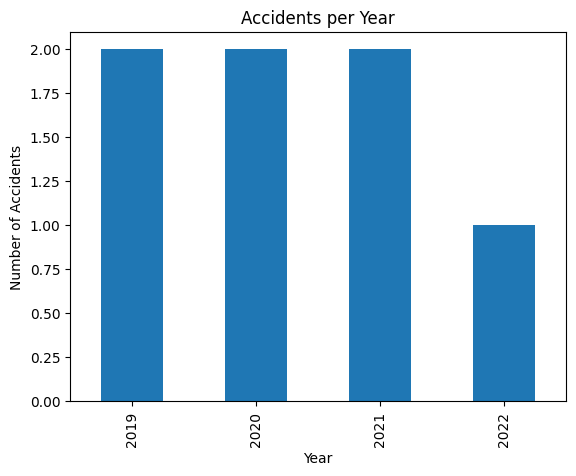

In [20]:
accident_per_year = london_fatal ['Year']. value_counts().sort_index()
accident_per_month = london_fatal ['Month'].value_counts().sort_index()

accident_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt. show()

month_names= {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August', 
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accident_per_month.index = accident_per_month.index.map(month_names)

<h1>QUESTIONS</h1>

<h1>1: WHAT YEAR HAS THE LOWEST SLIGHT ACCIDENTS IN BIRMINGHAM IN EACH YEAR </h1>

In [21]:
accident['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

In [22]:
accident[accident['District Area'] == 'Birmingham']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
68519,200720D003001,Slight,2019-01-02,52.513668,Darkness - lights lit,Birmingham,-1.901975,1,2,Wet or damp,Dual carriageway,Urban,Raining no high winds,Car,2019,1,2,2
68520,200720D003101,Slight,2019-01-02,52.502396,Daylight,Birmingham,-1.867086,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,1,2,2
68521,200720D003802,Serious,2019-01-03,52.563201,Daylight,Birmingham,-1.822793,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,1,3,3
68522,200720D005801,Slight,2019-01-02,52.493431,Daylight,Birmingham,-1.818507,1,2,Wet or damp,Dual carriageway,Urban,unaccounted,Car,2019,1,2,2
68523,200720D005901,Slight,2019-01-05,52.510805,Darkness - lights lit,Birmingham,-1.834202,1,3,Dry,Dual carriageway,Urban,Fine no high winds,Car,2019,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583759,201020Z500110,Slight,2022-12-20,52.506095,Darkness - lights lit,Birmingham,-1.878861,1,2,Snow,Single carriageway,Urban,Snowing no high winds,Car,2022,12,20,1
583760,201020Z500120,Slight,2022-12-16,52.514554,Darkness - lights lit,Birmingham,-1.765076,1,2,Frost or ice,Dual carriageway,Rural,Snowing no high winds,Car,2022,12,16,4
583761,201020Z500140,Slight,2022-12-27,52.507630,Darkness - lights lit,Birmingham,-1.814913,2,2,Wet or damp,Dual carriageway,Urban,Raining no high winds,Car,2022,12,27,1
583766,201020Z620211,Slight,2022-01-20,52.509143,Darkness - lights lit,Birmingham,-1.871043,2,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Taxi/Private hire car,2022,1,20,3


In [23]:
accident[accident['Accident_Severity'] == 'Slight']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle,2019,9,3,1
8,200701BS67515,Slight,2019-10-31,51.493319,Darkness - lights lit,Kensington and Chelsea,-0.173572,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,10,31,3
9,200701BS67543,Slight,2019-10-18,51.484539,Daylight,Kensington and Chelsea,-0.175651,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 125cc and up to 500cc,2019,10,18,4
13,200701BS67853,Slight,2019-11-08,51.508999,Darkness - lights lit,Kensington and Chelsea,-0.210701,3,2,Wet or damp,Single carriageway,Urban,Other,Car,2019,11,8,4
14,200701BS67859,Slight,2019-11-01,51.485125,Darkness - lights lit,Kensington and Chelsea,-0.167129,1,1,Dry,One way street,Urban,Fine no high winds,Car,2019,11,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660671,201091NM01053,Slight,2022-01-29,57.572162,Daylight,Highland,-3.930799,1,1,Frost or ice,Single carriageway,Rural,Other,Van / Goods 3.5 tonnes mgw or under,2022,1,29,5
660673,201091NM01190,Slight,2022-02-02,57.585152,Daylight,Highland,-3.748312,2,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2022,2,2,2
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0


In [24]:
birmingham_slight = accident[(accident['Accident_Severity'] == 'Slight') & (accident['District Area'] == 'Birmingham')]

In [25]:
birmingham_slight

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
68519,200720D003001,Slight,2019-01-02,52.513668,Darkness - lights lit,Birmingham,-1.901975,1,2,Wet or damp,Dual carriageway,Urban,Raining no high winds,Car,2019,1,2,2
68520,200720D003101,Slight,2019-01-02,52.502396,Daylight,Birmingham,-1.867086,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,1,2,2
68522,200720D005801,Slight,2019-01-02,52.493431,Daylight,Birmingham,-1.818507,1,2,Wet or damp,Dual carriageway,Urban,unaccounted,Car,2019,1,2,2
68523,200720D005901,Slight,2019-01-05,52.510805,Darkness - lights lit,Birmingham,-1.834202,1,3,Dry,Dual carriageway,Urban,Fine no high winds,Car,2019,1,5,5
68524,200720D006001,Slight,2019-01-04,52.487709,Daylight,Birmingham,-1.840032,3,2,Dry,Single carriageway,Urban,Other,Car,2019,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583759,201020Z500110,Slight,2022-12-20,52.506095,Darkness - lights lit,Birmingham,-1.878861,1,2,Snow,Single carriageway,Urban,Snowing no high winds,Car,2022,12,20,1
583760,201020Z500120,Slight,2022-12-16,52.514554,Darkness - lights lit,Birmingham,-1.765076,1,2,Frost or ice,Dual carriageway,Rural,Snowing no high winds,Car,2022,12,16,4
583761,201020Z500140,Slight,2022-12-27,52.507630,Darkness - lights lit,Birmingham,-1.814913,2,2,Wet or damp,Dual carriageway,Urban,Raining no high winds,Car,2022,12,27,1
583766,201020Z620211,Slight,2022-01-20,52.509143,Darkness - lights lit,Birmingham,-1.871043,2,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Taxi/Private hire car,2022,1,20,3


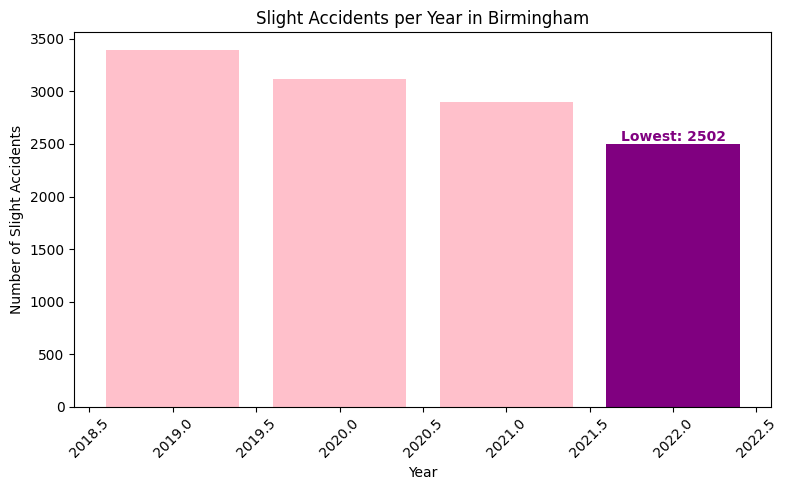

In [26]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst=True, errors='coerce')
accident['Year'] = accident['Accident Date'].dt.year

birmingham_slight = accident[
    (accident['District Area'].str.contains('Birmingham', case=False, na=False)) &
    (accident['Accident_Severity'] == 'Slight')
]

accidents_by_year = (
    birmingham_slight
    .groupby('Year')
    .size()
    .reset_index(name='Slight_Accident_Count')
)

lowest_slight_year = accidents_by_year.loc[
    accidents_by_year['Slight_Accident_Count'].idxmin()
]

lowest_slight_year

plt.figure(figsize=(8,5))
plt.bar(accidents_by_year['Year'], accidents_by_year['Slight_Accident_Count'], color='pink')


plt.bar(lowest_slight_year['Year'], lowest_slight_year['Slight_Accident_Count'], color='purple')

plt.xlabel('Year')
plt.ylabel('Number of Slight Accidents')
plt.title('Slight Accidents per Year in Birmingham')


plt.text(
    lowest_slight_year['Year'],
    lowest_slight_year['Slight_Accident_Count'] + 1,
    f"Lowest: {lowest_slight_year['Slight_Accident_Count']}",
    ha='center', va='bottom', color='purple', fontweight='bold'
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<H2>INSIGHT 1: The number of slight accidents in Birmingham has been steadily decreasing from 2019 to 2022.</H2>

<h2>INSIGHT 2: 2022 recorded the lowest number of slight accidents at 2,502.</H2>

<h1>2: IN WHAT YEAR GOT THE MOST NUMBER OF CASUALTIES IN CAMBRIDGE</h1>

In [27]:
accident['District Area'].unique()

array(['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames',
       'Hammersmith and Fulham', 'Hounslow', 'Tower Hamlets',
       'City of London', 'Southwark', 'Camden', 'Hackney', 'Islington',
       'Barnet', 'Brent', 'Haringey', 'Merton', 'Ealing', 'Enfield',
       'Greenwich', 'Newham', 'London Airport (Heathrow)', 'Hillingdon',
       'Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Bromley',
       'Havering', 'Croydon', 'Lambeth', 'Wandsworth', 'Sutton', 'Bexley',
       'Lewisham', 'Harrow', 'Kingston upon Thames', 'Barrow-in-Furness',
       'South Lakeland', 'Carlisle', 'Eden', 'Allerdale', 'Copeland',
       'Fylde', 'Blackpool', 'Wyre', 'Lancaster', 'Chorley',
       'West Lancashire', 'South Ribble', 'Preston',
       'Blackburn with Darwen', 'Hyndburn', 'Ribble Valley', 'Burnley',
       'Pendle', 'Rossendale', 'Wirral', 'Liverpool', 'Sefton',
       'Knowsley', 'St. Helens', 'Manchester', 'Salford', 'Tameside',
       'Stockport', 'Bolton', 'Wigan', '

In [28]:
cambridge = (
    accident[accident['District Area'] == 'Cambridge']
    .groupby('Year')['Number_of_Casualties']
    .mean()
)

In [29]:
cambridge

Year
2019    1.171429
2020    1.157277
2021    1.132743
2022    1.141148
Name: Number_of_Casualties, dtype: float64

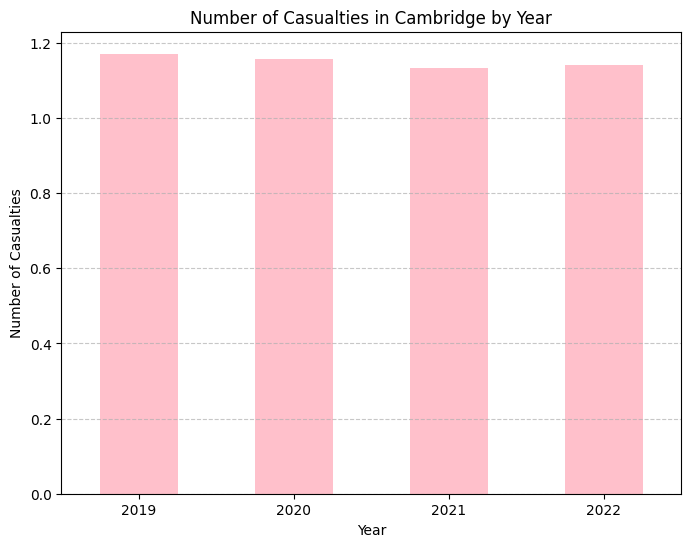

In [30]:
cambridge_location = {
    'Year': [2019, 2020, 2021, 2022],
    'Number_of_Casualties': [1.171429, 1.157277, 1.132743, 1.141148]
}

cambridge = pd.DataFrame(cambridge_location).set_index('Year')

plt.figure(figsize=(8, 6)) 
cambridge['Number_of_Casualties'].plot(kind='bar', color='pink')

plt.title('Number of Casualties in Cambridge by Year')
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h2>INSIGHT 1: 2019 had the highest average number of casualties (1.171429) among the years shown. This suggests it was the most severe year for accidents in Cambridge during this period.</h2>

<h2>INSIGHT 2: While the 2021 got the lowest number of casualties among the years shown suggesting that the accidents number dropped during lock down.</h2>

<h1>3: IN WHAT YEAR GOT THE LEAST NUMBER OF CASUALTIES IN KENSINGTON AND CHELSEA</h1>

In [31]:
kensington_and_chelsea = (
    accident[accident['District Area'] == 'Kensington and Chelsea']
    .groupby('Year')['Number_of_Casualties']
    .value_counts()
)

In [32]:
kensington_and_chelsea

Year  Number_of_Casualties
2019  1                       618
      2                        60
      3                        11
      5                         2
      4                         1
      9                         1
2020  1                       655
      2                        59
      3                        12
      5                         2
      4                         1
      6                         1
2021  1                       599
      2                        56
      3                         7
      4                         3
      5                         2
      11                        1
2022  1                       638
      2                        60
      3                         6
      4                         4
Name: count, dtype: int64

<h2>INSIGHT 1: The total casualties show a significant decrease from 2019 to 2021, followed by a sharp increase in 2022, making 2021 the year with the lowest total.</h2>

<h1>4: How much more frequent are 'Slight' accidents compared to 'Serious' accidents?</h1>

In [33]:
westminster_accident = accident[accident['District Area'] == 'Westminster']

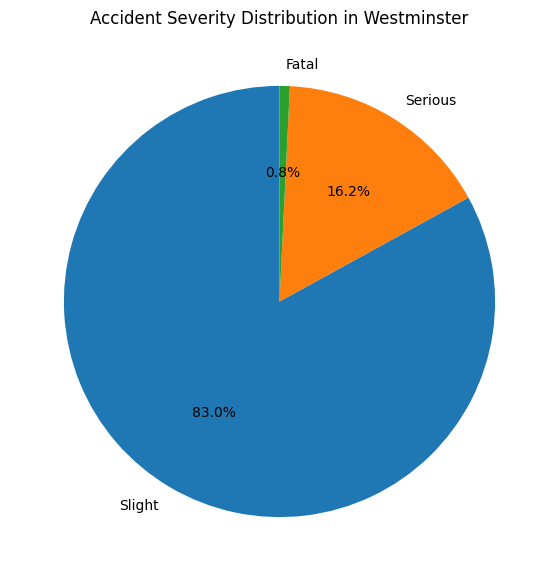

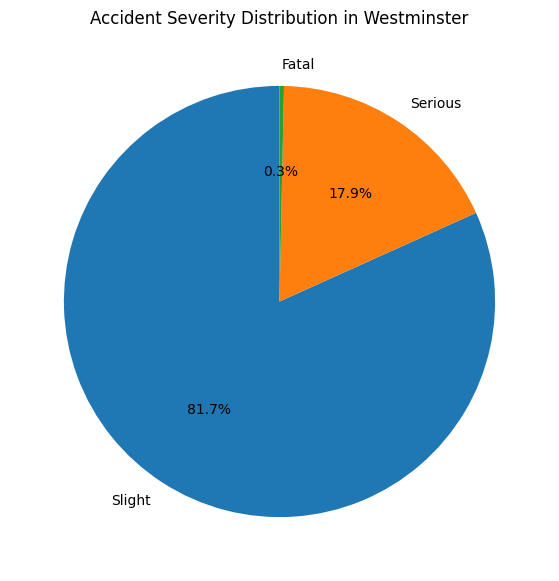

In [34]:
severity_westminster  = westminster_accident['Accident_Severity'].value_counts()

plt.pie(severity_westminster,
        labels = severity_westminster.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution in Westminster')
plt.show()

severity_2019_westminster = westminster_accident[westminster_accident['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_westminster['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution in Westminster')
plt.show()

<h2>INSIGHT 1: In the earlier period, Slight accidents were 412% more frequent than Serious accidents.</h2>

<h2>INSIGHT 2: In the later period, Slight accidents were 356% more frequent than Serious accidents, showing that the most severe accidents are becoming relatively more common.</h2>

<h1>5: WHAT KIND OF ROAD SURFACE CONDITIONS GOT MORE ACCIDENT IN WESTMINSTER?</h1>

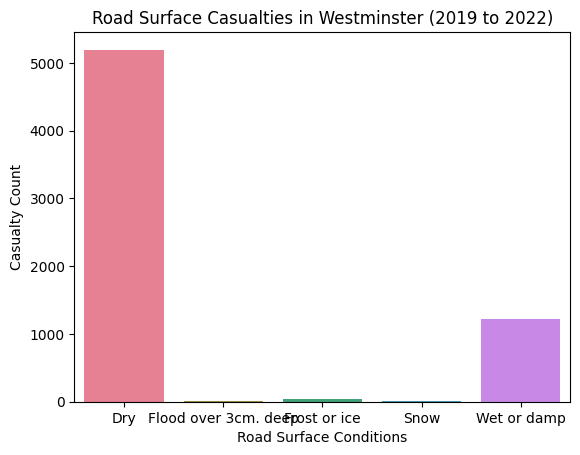

In [35]:
westminster_df = accident[accident['District Area'] == 'Westminster']

road_type_by_district = (
    westminster_df
    .groupby('Road_Surface_Conditions')['Number_of_Casualties']
    .sum()
    .reset_index()
    .rename(columns={'Number_of_Casualties': 'Casualty_Count'})
)

sns.barplot(
    data=road_type_by_district,
    x='Road_Surface_Conditions',
    y='Casualty_Count',
    palette='husl' 
)
plt.xlabel('Road Surface Conditions')
plt.ylabel('Casualty Count')
plt.title('Road Surface Casualties in Westminster (2019 to 2022)')
plt.show()


<h2>INSIGHT 1: Dry road surfaces recorded the highest number of casualties, indicating that most accidents occured under normal driving conditions.</h2>

<h2>INSIGHT 2: Wet or damp roads had the second highest casualty count, showing that slippery conditions also contribute significantly to accidents compared to snows, ice, or flooding.</h2>

<h1>6: Which Vehicle Type is involved in the most accidents?</h1>

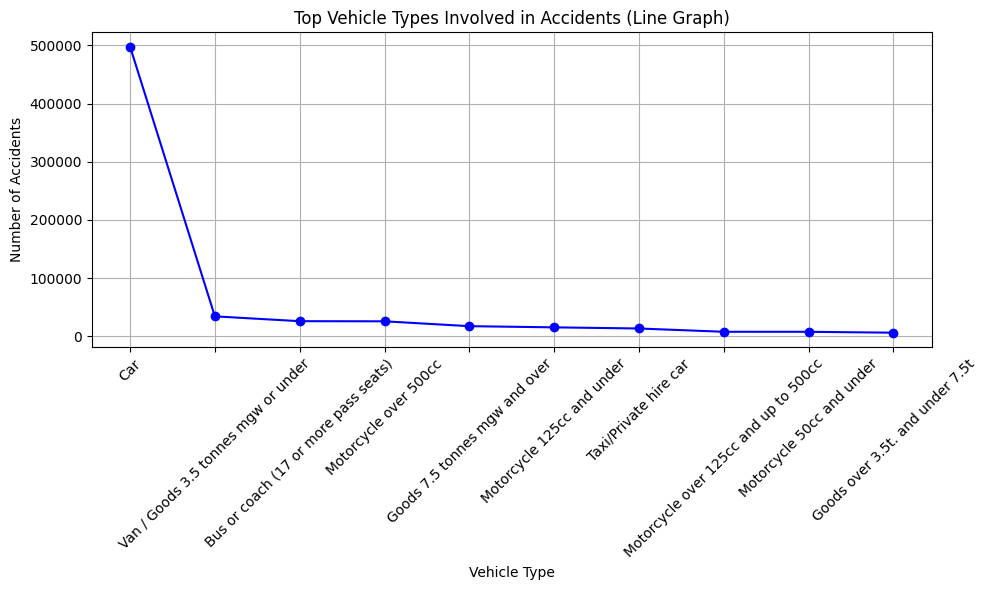

In [36]:
vehicle_counts = accident['Vehicle_Type'].value_counts().reset_index()
vehicle_counts.columns = ['Vehicle_Type', 'Accident_Count']

vehicle_counts = vehicle_counts.head(10).sort_values(by='Accident_Count', ascending=False)

plt.figure(figsize=(10,6))
plt.plot(vehicle_counts['Vehicle_Type'], vehicle_counts['Accident_Count'], 
         marker='o', linestyle='-', color='blue')

plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title('Top Vehicle Types Involved in Accidents (Line Graph)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<h2>INSIGHT 1: Cars are by far the most involved vehicle type in accidents, with a significantly higher count compared to to all other vehicle types.</h2>

<h2>INSIGHT 2: Other vehicle types such as vans, buses, motorcycles, and taxis show much lower accident counts, with motorcycles appearing more frequently than heavier goods vehicle.</h2>

<h1>7: WHICH YEAR, MONTH, DAY OF WEEK GOT THE MOST ACCIDENTS IN LONDON AIRPORT (HEATHROW)? </h1>

In [37]:
airport = accident[accident['District Area'] == 'London Airport (Heathrow)']

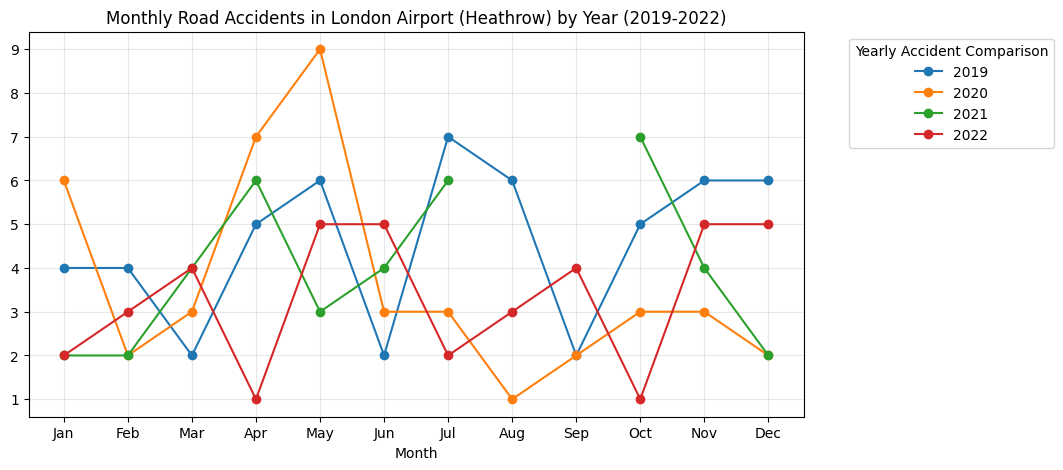

In [38]:
monthly_londondata = airport.groupby(['Year', 'Month']).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in London Airport (Heathrow) by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2>INSIGHT 1: 2020 mid-year peak: The year 2020 recorded the highest spike in June with 9 accidents, significantly higher than other years in the same period.</h2>

<h2>INSIGHT 2: Early-year surges: In 2019 and 2022, accident numbers rose significantly in the first quarter, suggesting that January to March consistently experiences more frequent accidents across different years.</h2>

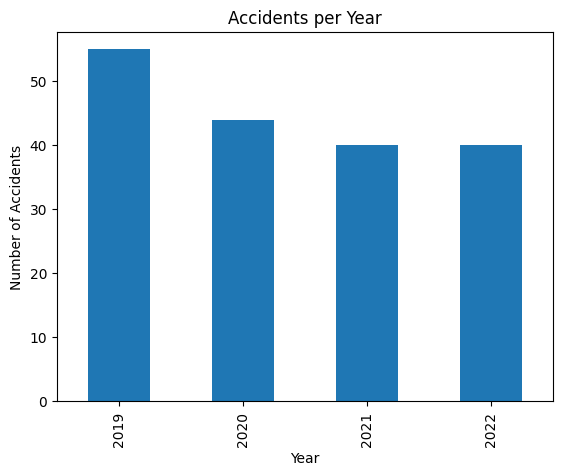

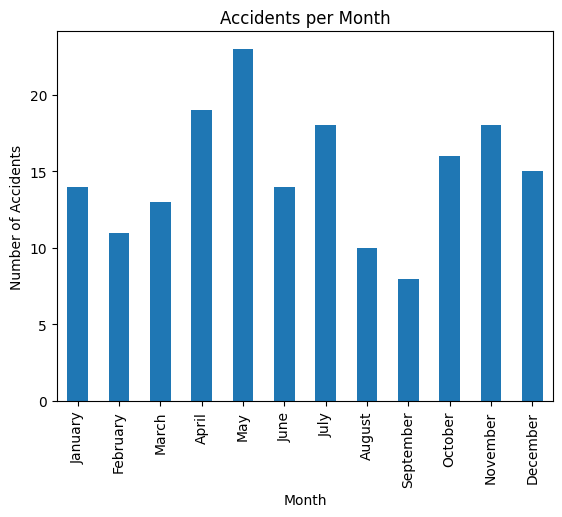

DayOfWeek
Monday       22
Tuesday      24
Wednesday    25
Thursday     37
Friday       24
Saturday     27
Sunday       20
Name: count, dtype: int64


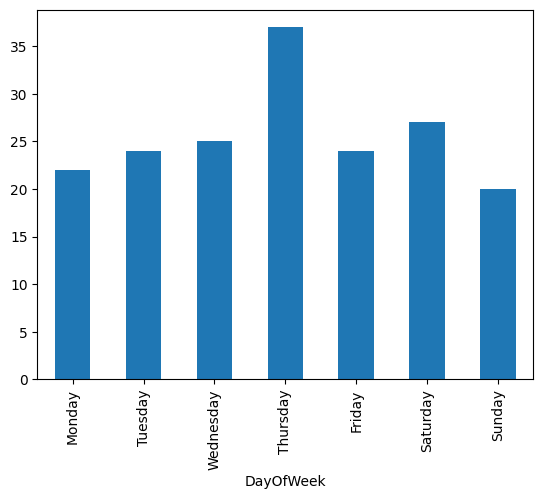

In [39]:
# Accidents per year
accidents_per_year = airport['Year'].value_counts().sort_index()
accidents_per_month = airport['Month'].value_counts().sort_index()
accidents_per_day = airport['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h2>INSIGHT 1: The chart shows that accidents were highest in 2019 and then dropped in 2020, with numbers remaining relatively stable but slightly lower from 2020 to 2022.</h2>

<h2>INSIGHT 2: The chart shows that May had the highest number of accidents, while September recorded the lowest, indicating seasonal variations in accident frequency.</h2>

<h2>INSIGHT 3: The chart shows that Thursday had the highest number if accidents, while Sunday recorded the lowest suggesting weekday traffic contributes more to accidents than weekends. </h2> 

<h1>8: WHAT KIND OF WEATHER CONDITIONS GOT THE MOST FATAL ACCIDENT?</h1>

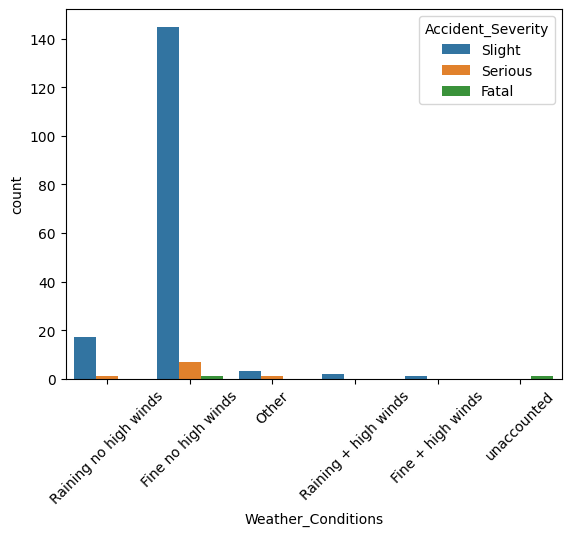

In [40]:
sns.countplot(
    x='Weather_Conditions',
    hue='Accident_Severity',
    data=airport
)
plt.xticks(rotation=45)
plt.show()

<H2>INSIGHTS 1: Fine weather with no high winds had the most fatal accidents, showing that the severe crashes often occur even in clear conditions.</H2>

<H2>INSIGHT 2: Raining with no high winds also contributed to some fatal accidents, but at a much lower count compared to fine weather.</H2>

<h1>9: Which district area has the lowest number of accidents?</h1>

In [41]:
district_accidents = accident.groupby("District Area")["Index"].count().reset_index()

lowest_accident_district = district_accidents.sort_values(by="Index", ascending=True).head(1)

print("District with the lowest number of accidents:")
print(lowest_accident_district)


District with the lowest number of accidents:
       District Area  Index
81  Clackmannanshire     91


<H2>INSIGHT 1: Clackmannanshire recorded the lowest number of accidents (91), indicating it is a relatively safer district compared to others.</H2>

<h2>INSIGHT 2: Larger urban districts likely have significantly higher accident counts, suggesting population density and traffic volume strongly influence accident frequency. </h2>

<h1>10: WHICH TYPE OF ROAD IN CAMDEN HAD TEH HIGHEST DISTRIBUTION OF CASUALTIES BETWEEN 2019 AND 2022?</h1>

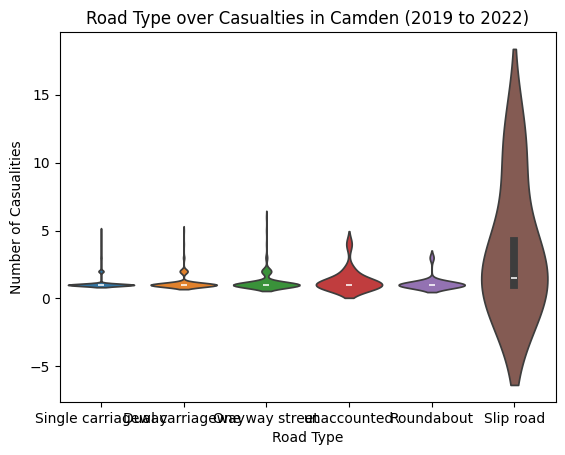

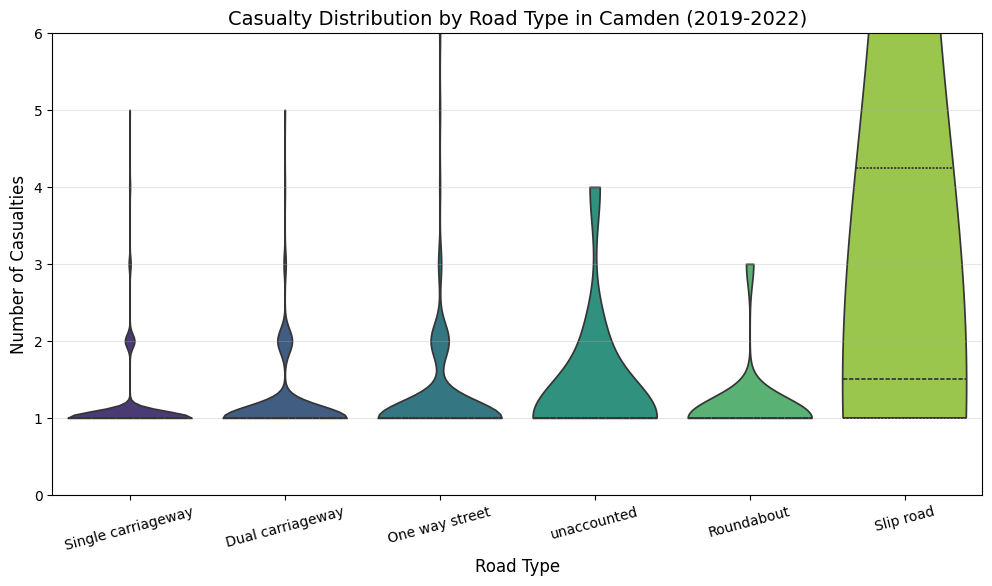

In [42]:
district_data = accident[accident["District Area"] == "Camden"]

# First violin plot
sns.violinplot(data=district_data, x='Road_Type', y='Number_of_Casualties', hue='Road_Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Casualities')
plt.title('Road Type over Casualties in Camden (2019 to 2022)')
plt.show()


# %% [code]
plt.figure(figsize=(12, 6))

# CORRECTED VIOLIN PLOT (no redundant hue!)
sns.violinplot(
    x='Road_Type',
    y='Number_of_Casualties',
    data=district_data,
    inner="quart",   # Shows median and IQR (better than full box)
    cut=0,           # Trims to actual data range (critical for skewed data!)
    scale="width",   # Makes all violins same width for fair comparison
    palette="viridis"
)

# ADD THESE CRITICAL FORMATTING LINES:
plt.ylim(0, 6)  # Focus on MOST COMMON range (0-6 casualties)
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)
plt.title('Casualty Distribution by Road Type in Camden (2019-2022)', fontsize=14)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Number of Casualties', fontsize=12)
plt.show()

<h2>INSIGHTS 1: Slip Roads recorded the highest distribution of casualties compared to all other road types in Camden from 2019 to 2022.</h2>

<h2>INSIGHTS 2: Roundabouts and one-way streets had fewer casualties, showing they are relatively safer road types during the same period.</h2>

<h1>11: IN WHAT YEAR GOT THE HIGHEST NUMBER OF ACCIDENTS IN LONDON AIRPORT (HEATHROW)</h1>

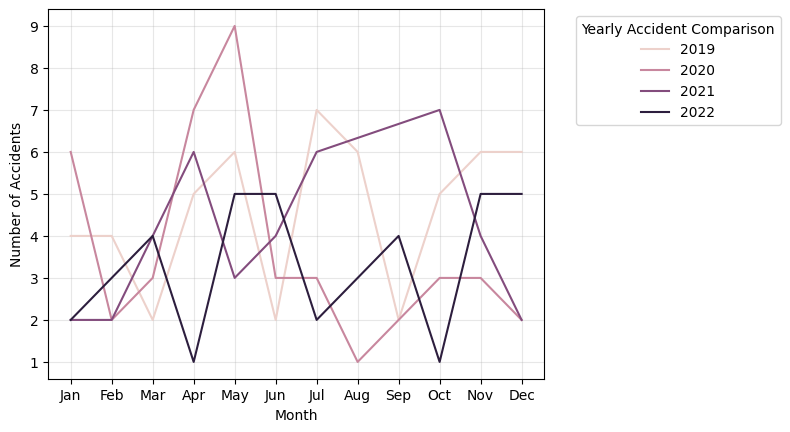

In [43]:
monthly_airport = airport.groupby(['Year', 'Month']).size().reset_index(name = 'Number of Accidents')
monthly_airport

sns.lineplot(data=monthly_airport, x = 'Month', y = 'Number of Accidents',hue='Year')
  
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()


<h2>INSIGHTS 1: Peak in 2020 (May): The year 2020 recorded the highest number of accidents in May, reaching 9 accidents, which is noticeably higher compared to other years and months.</h2>

<H2>INSIGHTS 2: Consistent mid-year rise (2019 & 2021): Both 2019 and 2021 show a visible increase in accidents around June–August, suggesting that mid-year months tend to experience more accidents compared to earlier months.</H2>

<H1>12: IN WHAT YEAR GOT THE HIGHEST NUMBER OF ACCIDENTS IN GREENWICH?</H1>

In [44]:
pizza = accident[accident['District Area'] == 'Greenwich']

In [45]:
pizza

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
5260,200701HT20266,Serious,2019-04-17,51.501546,Daylight,Greenwich,0.000094,1,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,4,17,2
7886,200701KF60073,Slight,2019-02-15,51.496475,Daylight,Greenwich,0.002177,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Motorcycle 125cc and under,2019,2,15,4
11119,200701PL60152,Slight,2019-03-23,51.471408,Daylight,Greenwich,-0.015047,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2019,3,23,5
11144,200701PL60180,Slight,2019-03-21,51.472168,Daylight,Greenwich,0.003704,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,3,21,3
11182,200701PL60226,Slight,2019-04-04,51.472936,Daylight,Greenwich,-0.014981,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533286,201001TD00078,Serious,2022-03-12,51.448948,Darkness - lights lit,Greenwich,0.025715,1,2,Wet or damp,Dual carriageway,Urban,Raining no high winds,Motorcycle 125cc and under,2022,3,12,5
533292,201001TD00085,Fatal,2022-03-21,51.441368,Daylight,Greenwich,0.073442,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,3,21,0
533293,201001TD00088,Serious,2022-03-16,51.481210,Daylight,Greenwich,-0.025712,1,1,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2022,3,16,2
533309,201001TD00112,Slight,2022-03-22,51.450606,Daylight,Greenwich,0.054430,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,3,22,1


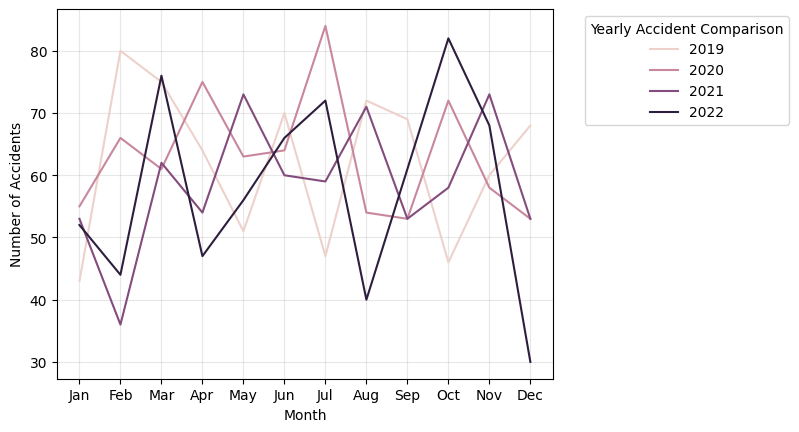

In [46]:
monthly_pizza = pizza.groupby(['Year', 'Month']).size().reset_index(name = 'Number of Accidents')
monthly_pizza

sns.lineplot(data=monthly_pizza, x = 'Month', y = 'Number of Accidents',hue='Year')
  
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2>INSIGHT 1: Highest spikes in 2020 and 2022: Both years saw sharp increases, with 2020 peaking in July (85 accidents) and 2022 peaking in October (82 accidents), marking the highest recorded accident counts.</h2>

<H2>INSIGHT 2: Early-year surges: In 2019 and 2022, accident numbers rose significantly in the first quarter, suggesting that January to March consistently experiences more frequent accidents across different years.</H2>

<H1>13: Where do serious accidents most often occur in Southwark?</H1>

In [47]:
southwark_df = accident[accident['District Area']== 'Southwark']

In [48]:
southwark_serious = southwark_df[southwark_df['Accident_Severity'] == 'Serious']

In [49]:
import folium
from folium.plugins import HeatMap

locations  = list(zip(southwark_serious['Latitude'],southwark_serious['Longitude']))

m = folium.Map(location=[southwark_serious['Latitude'].mean(), southwark_serious['Longitude'].mean()], zoom_start=10)

# Step 3: Add the heatmap layer
HeatMap(locations).add_to(m)

# Step 4: Save or display the map
m.save('accident_heatmap.html')  # Save the map as an HTML file
m  # Display the map in a Jupyter Notebook

<h2>INSIGHT 1: Southwark Station area (51.5031°N, -0.1055°W): A strong cluster is visible near Southwark Underground, marking it as one of the most serious accident-prone zones.</h2>

<h2>INSIGHT 2: London Bridge / Borough area (51.5055°N, -0.0911°W): High-density accidents appear around Borough High Street, showing repeated severity in this busy corridor.</h2>

<h2>INSIGHT 3: Elephant and Castle junction (51.4947°N, -0.1003°W): Another hotspot emerges south of Southwark, highlighting the junction’s vulnerability to serious accidents.</h2>

<h1>14: Where are the most critical hotspots of fatal accidents in Hackney?</h1>

In [50]:
hackney_df = accident[accident['District Area']== 'Hackney']

In [51]:
hackney_fatal = hackney_df[hackney_df['Accident_Severity'] == 'Fatal']

In [53]:
locations  = list(zip(hackney_fatal['Latitude'],hackney_fatal['Longitude']))

m = folium.Map(location=[hackney_fatal['Latitude'].mean(), hackney_fatal['Longitude'].mean()], zoom_start=10)

# Step 3: Add the heatmap layer
HeatMap(locations).add_to(m)

# Step 4: Save or display the map
m.save('accident_heatmap.html')  # Save the map as an HTML file
m  # Display the map in a Jupyter Notebook

<h2>INSIGHT 1: Shoreditch area (51.5260°N, -0.0786°W): Multiple intense hotspots are concentrated around Shoreditch, showing it as a critical zone for fatal accidents.</h2>

<h2>INSIGHT 2: Dalston Junction (51.5460°N, -0.0751°W): A strong cluster is present here, marking it as one of the most dangerous points in Hackney.</h2>

<h3>INSIGHT 3: Hackney Wick (51.5431°N, -0.0228°W): Another significant hotspot appears near Hackney Wick, highlighting serious accident risks in this eastern part of Hackney.</h3>